# Ventilator Study
### This notebook demonstrates a connection between System Model and Studio and Amesim to drive parameters into a real-time ventilator and patient model.

![Inline-style image](AmesimModel.png 'Amesim Image')

In [1]:
%acel clear 
%include Ventilator_Acel.acel

In [2]:
acel.lib.displayAcelModel(acel.amesim_model)

In [3]:
architectures = acel.lib.solve(acel.amesim_model, allowUnconnectedArchitectures=True,saveArchitectures=True, outputTime=1)

Run: amesim_model - 
 - - - - - - - - - - - - - - -
Creating ensembles...
... done in 0.128 seconds.
 - 1 total ensembles
... Instantiating ensembles...
 ... 100.00% instantiated in 0.027 seconds
 - 1 ensembles
... done in 0.158 seconds, maximum tree width = 0, maximum multiplicity = 1.
 - - - - - - - - - - - - - - -
Creating architectures...
 - 1 unique architectures in 0.530 seconds
... done in 0.531 seconds.
 - - - - - - - - - - - - - - -
 - - - - - - - - - - - - - - -
 - - - - - - - - - - - - - - -
Done: amesim_model - 
 -  1 Ensemble
 -  1 Architecture
 -  1 Iteration
 -  0 Unconnected Solutions
 -  0 Symmetric Solutions
 -  0.530 " Total ConnectionSolving
 -  0.005 " SAT Solving
 -  0.002 " Filtering
 -  0.000 " Data Interpretation
 -  0.440 " File IO
 -  708.1 MB Memory Usage


In [4]:
acel.lib.displayArchitectures(architectures)

Access the System Model that is in GitHUB folder with a python module "caplellambse" that can read and modify the SMW/Capella model content.

In [5]:
import capellambse

from IPython.core.display import HTML

resources = {
    "CR_Ventilator_Sim": "CR_Ventilator_Sim/CR_Ventilator_Sim",
}
path_to_model = "../CR_Ventilator.aird"
model = capellambse.MelodyModel(path_to_model, resources=resources, jupyter_untrusted=False)

The 'jupyter_untrusted' argument is no longer needed and will be removed soon. Please remove it from your calls.
Duplicate UUID '_LB2MSY7lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MS47lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MTY7lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MT47lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MUY7lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MU47lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Cannot load PVMT extension: ValueError: Provided model does not have a PropertyValuePkg
Property values are not available in this model


Display a diagram from the capella module with parameters being accessed.

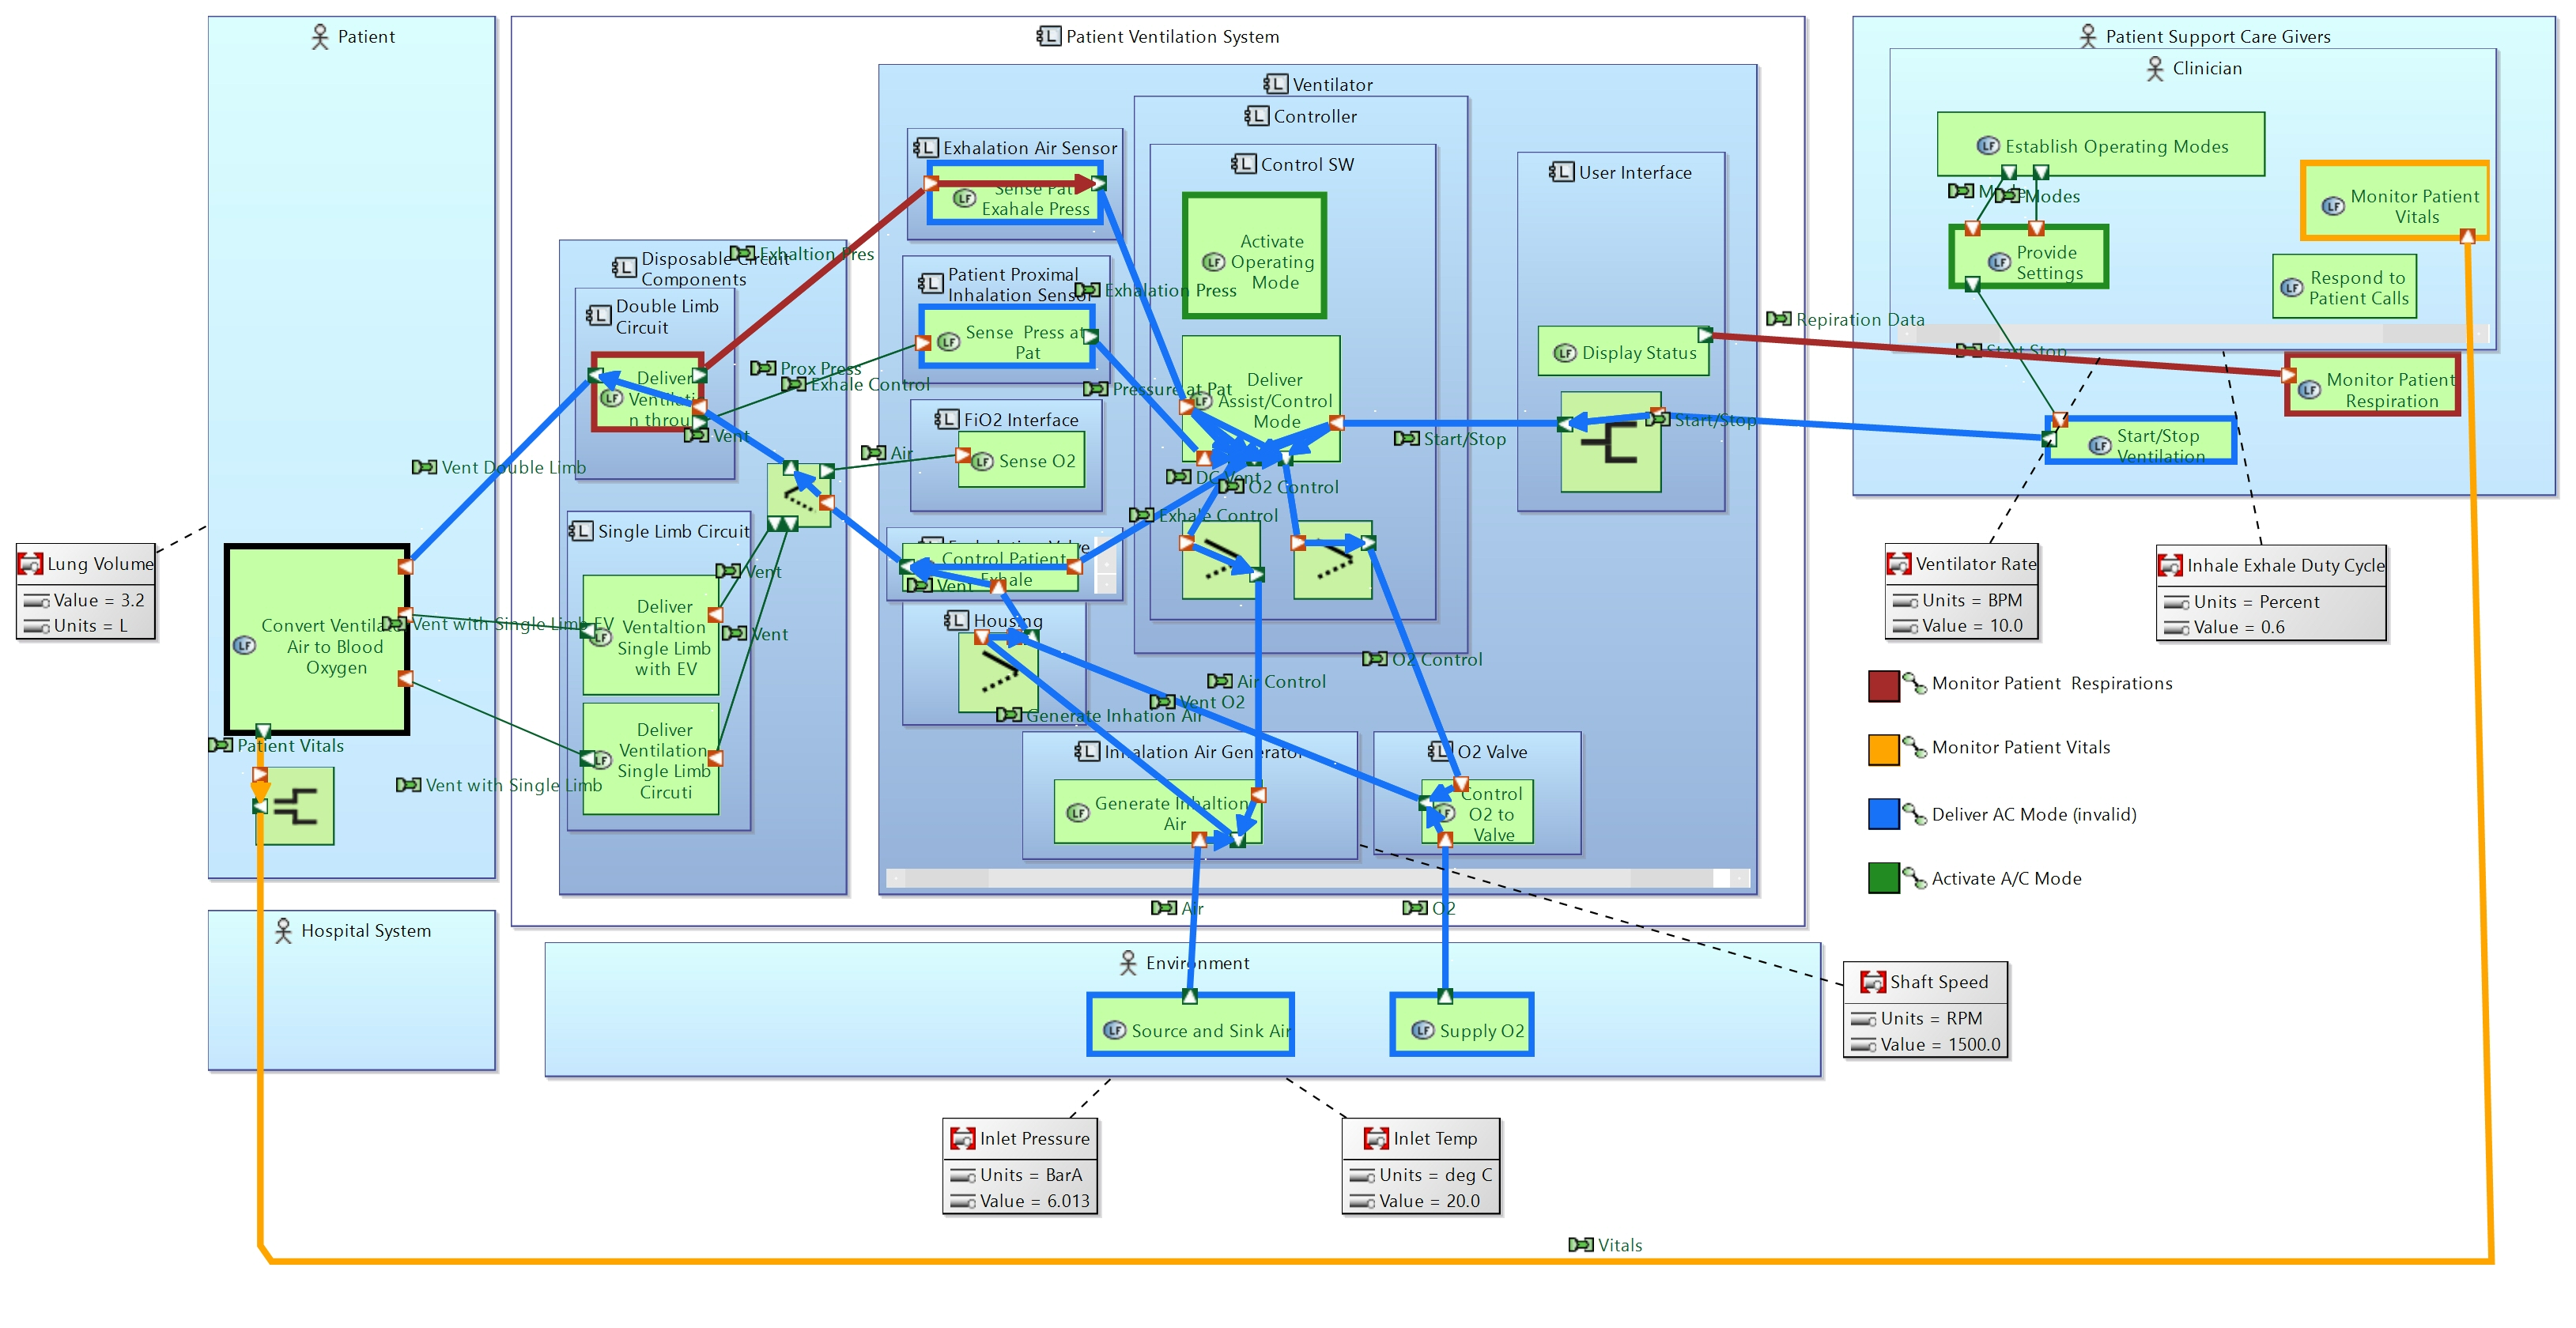

In [6]:
from IPython import display
display.Image("../Images/Demo 1[LAB] Double Limb AC View.jpg")

Python is used to access the System Model parameters overwrite the default AMESIM parameters in the System, Controller and Ventilator.

In [7]:
comp_actor = 0
model_parameter = 1
amesim_parameter = 2
component_param_table =[
    ["Inhalation Air Generator","Shaft Speed"],
    ["Patient","Lung Volume"],
    ["Environment","Inlet Pressure"],
    ["Environment","Inlet Temp"],
    ["Clinician","Ventilator Rate"],
    ["Clinician","Inhale Exhale Duty Cycle"]   
]
for row in component_param_table:
    comp = model.search("LogicalComponent").by_name(row[comp_actor])
    print(row[comp_actor],"-",row[model_parameter],":",comp.property_value_groups[row[model_parameter]]["Value"],comp.property_value_groups[row[model_parameter]]["Units"])
    if row[comp_actor] == "Inhalation Air Generator" and row[model_parameter] == "Shaft Speed": 
        CompressorSpeed = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Patient" and row[model_parameter] == "Lung Volume": 
            LungCapacity = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Environment" and row[model_parameter] == "Inlet Pressure": 
            Pressure = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Environment" and row[model_parameter] == "Inlet Temp": 
            Temp = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Clinician" and row[model_parameter] == "Ventilator Rate": 
            Rate = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Clinician" and row[model_parameter] == "Inhale Exhale Duty Cycle": 
            Duty = comp.property_value_groups[row[model_parameter]]["Value"]

Humidity = 90
Frequency = Rate / 60
O2Valve = 0.1

#System
architectures[0].architecture.getVariable('p_0').value = Pressure
architectures[0].architecture.getVariable('T_0').value = Temp
architectures[0].architecture.getVariable('V_0').value = LungCapacity
architectures[0].architecture.getVariable('humidity').value = Humidity

#Controller: 
architectures[0].architecture.getBlock('Controller_0').getVariable('freq').value = Frequency
architectures[0].architecture.getBlock('Controller_0').getVariable('duty').value = Duty

#Ventilator:
architectures[0].architecture.getBlock('Ventilator_0').getVariable('Comp_speed').value = CompressorSpeed
architectures[0].architecture.getBlock('Ventilator_0').getVariable('O2_ValvePos').value = O2Valve

#print (architectures[0].architecture.getVariable('p_0').value) 

Inhalation Air Generator - Shaft Speed : 1500.0 RPM
Patient - Lung Volume : 3.2 L
Environment - Inlet Pressure : 6.013 BarA
Environment - Inlet Temp : 20.0 deg C
Clinician - Ventilator Rate : 10.0 BPM
Clinician - Inhale Exhale Duty Cycle : 0.6 Percent


In [8]:
%service start simulation -n 1 -p Vent

Starting Simcenter Studio Simulation 2404 service...
Starting APIs (usually takes about 10 seconds)...
Done


In [9]:
results = acel.lib.evaluate(acel.amesim_model, architectures, userLibraries=['Lib_Vent'], pool='Vent', directory = 'results', layouter=True)

Realizing Architectures...
Removed previous results file
Linking and retrieving results...
Results stored in amesim_model.hdf5
Done.


In [10]:
%service stop simulation -p Vent

Stopping Simcenter Studio Simulation service...
Done


## Post Processing

In [11]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

results = acel.lib.results('amesim_model')
data_frame_acc = results.get(scenarios = "Simulation")

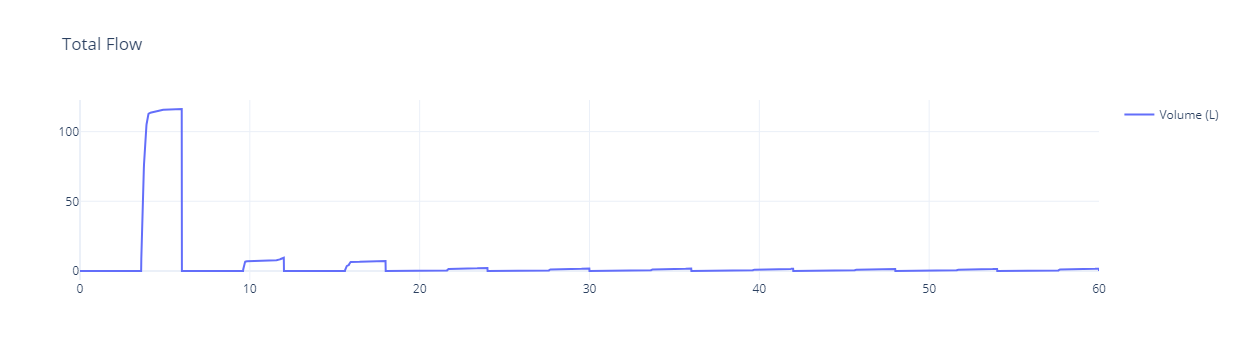

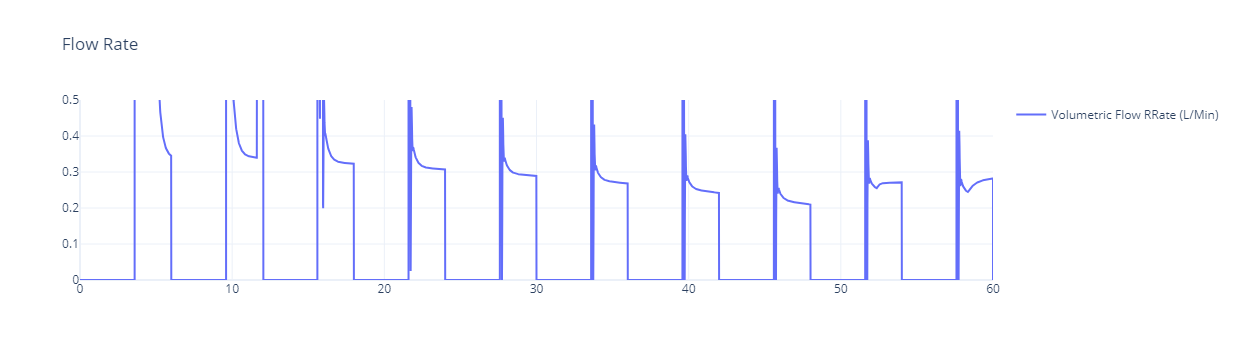

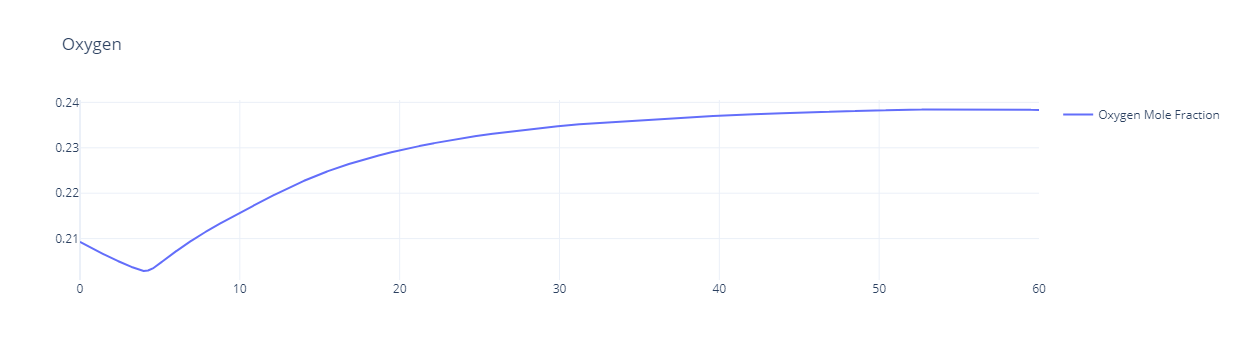

In [12]:
fig1 = make_subplots(rows=1, cols=1)
colorlist = px.colors.qualitative.Plotly
for idx, architecturename in enumerate(set(data_frame_acc.Architecture)):
    data_frame_sim = results.get(scenarios = 'Simulation', architectures=[architecturename])
    showlegend = True if idx == 0 else False     
    fig1.add_scatter(x=data_frame_sim['Time'],y=data_frame_sim['VolSensor_0.Volume'], name='Volume (L)', 
                     mode="lines", row=1, col=1, showlegend=showlegend, line=dict(color=colorlist[0]))
fig1.update_layout(title="Total Flow")
fig1.show()    

fig2 = make_subplots(rows=1, cols=1)
colorlist = px.colors.qualitative.Plotly
for idx, architecturename in enumerate(set(data_frame_acc.Architecture)):
    data_frame_sim = results.get(scenarios = 'Simulation', architectures=[architecturename])
    showlegend = True if idx == 0 else False     
    fig2.add_scatter(x=data_frame_sim['Time'],y=data_frame_sim['VolSensor_0.VolFlow'], name='Volumetric Flow RRate (L/Min)', 
                     mode="lines", row=1, col=1, showlegend=showlegend, line=dict(color=colorlist[0]))
fig2.update_layout(title="Flow Rate", yaxis_range=[0,0.5])
fig2.show()    


fig3 = make_subplots(rows=1, cols=1)
colorlist = px.colors.qualitative.Plotly
for idx, architecturename in enumerate(set(data_frame_acc.Architecture)):
    data_frame_sim = results.get(scenarios = 'Simulation', architectures=[architecturename])
    showlegend = True if idx == 0 else False     
    fig3.add_scatter(x=data_frame_sim['Time'],y=data_frame_sim['P_O2_Sensor_0.o2_frac'], name='Oxygen Mole Fraction', 
                     mode="lines", row=1, col=1, showlegend=showlegend, line=dict(color=colorlist[0]))
fig3.update_layout(title="Oxygen")
fig3.show()   